## import dependencies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

## load data

In [2]:
df = pd.read_csv('../data/data_sudah_bersih.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Pengiriman            9691 non-null   object 
 1   Tanggal                  9691 non-null   object 
 2   Waktu_Keberangkatan      9691 non-null   object 
 3   Waktu_Kedatangan         9691 non-null   object 
 4   Lat_Jemput               9691 non-null   float64
 5   Lon_Jemput               9691 non-null   float64
 6   Lat_Tujuan               9691 non-null   float64
 7   Lon_Tujuan               9691 non-null   float64
 8   Jarak_KM_Terukur         9691 non-null   float64
 9   ID_Kurir                 9691 non-null   int64  
 10  Tipe_Kendaraan           9691 non-null   object 
 11  Pengalaman_Kurir         9691 non-null   object 
 12  Jumlah_Paket             9691 non-null   int64  
 13  Kondisi_Cuaca            9691 non-null   object 
 14  Kondisi_Lalu_Lintas     

In [3]:
# object ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Waktu_Keberangkatan'] = pd.to_datetime(df['Waktu_Keberangkatan'])
df['Waktu_Kedatangan'] = pd.to_datetime(df['Waktu_Kedatangan'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Pengiriman            9691 non-null   object        
 1   Tanggal                  9691 non-null   datetime64[ns]
 2   Waktu_Keberangkatan      9691 non-null   datetime64[ns]
 3   Waktu_Kedatangan         9691 non-null   datetime64[ns]
 4   Lat_Jemput               9691 non-null   float64       
 5   Lon_Jemput               9691 non-null   float64       
 6   Lat_Tujuan               9691 non-null   float64       
 7   Lon_Tujuan               9691 non-null   float64       
 8   Jarak_KM_Terukur         9691 non-null   float64       
 9   ID_Kurir                 9691 non-null   int64         
 10  Tipe_Kendaraan           9691 non-null   object        
 11  Pengalaman_Kurir         9691 non-null   object        
 12  Jumlah_Paket             9691 non-

## Feature Engineering

In [4]:
df.head()

,ID_Pengiriman,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Tipe_Kendaraan,Pengalaman_Kurir,Jumlah_Paket,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Area_Tujuan,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
0,DEL-00001,2023-10-09 10:28:00,2023-10-09 10:28:00,2023-10-09 12:09:35.444386,-6.187770,106.884394,-6.324869,106.783430,39.447726,21,Motor,Menengah,37,Badai,Sedang,Perumahan,101.590740,63.494212,1
1,DEL-00002,2023-09-15 17:07:00,2023-09-15 17:07:00,2023-09-15 17:53:45.354053,-6.140012,106.898952,-6.140302,106.711119,19.092558,7,Motor,Menengah,5,Hujan_Ringan,Ringan,Perumahan,46.755901,42.690170,0
2,DEL-00003,2023-09-21 13:57:00,2023-09-21 13:57:00,2023-09-21 14:05:42.112794,-6.101567,106.948339,-6.204143,106.927419,1.000000,1,Motor,Menengah,5,Cerah,Sedang,Perumahan,8.701880,7.614145,0
3,DEL-00004,2023-09-19 13:10:00,2023-09-19 13:10:00,2023-09-19 13:53:23.355129,-6.112538,106.778596,-6.292112,106.655991,23.393818,1,Motor,Rendah,11,Cerah,Sedang,Perumahan,43.389252,37.965596,0
4,DEL-00005,2023-09-11 14:52:00,2023-09-11 14:52:00,2023-09-11 15:15:47.785700,-6.085218,106.912228,-6.172220,106.816521,17.144595,18,Mobil_Van,Rendah,16,Cerah,Ringan,Perumahan,23.796428,24.986250,0


In [5]:
df.describe()

,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan
count,9691,9691,9691,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,2023-09-30 20:48:11.416778496,2023-09-30 20:48:11.416778496,2023-09-30 21:33:53.297527296,-6.197638,106.798249,-6.200412,106.800504,21.289130,24.965432,21.827262,45.698012,40.334227,0.046538
min,2023-09-01 07:01:00,2023-09-01 07:01:00,2023-09-01 07:10:08.759818,-6.349986,106.650002,-6.349995,106.650003,1.000000,1.000000,5.000000,5.000000,-21.089756,0.000000
25%,2023-09-15 19:21:00,2023-09-15 19:21:00,2023-09-15 20:07:28.760557568,-6.271613,106.722333,-6.275658,106.726160,11.004318,13.000000,13.000000,22.264043,20.594671,0.000000
50%,2023-09-30 12:02:00,2023-09-30 12:02:00,2023-09-30 12:55:58.612155904,-6.196669,106.798409,-6.201043,106.801456,21.132235,25.000000,22.000000,43.032301,39.956525,0.000000
75%,2023-10-15 16:42:30,2023-10-15 16:42:30,2023-10-15 17:27:01.473426432,-6.124559,106.872642,-6.124198,106.874909,31.142623,37.000000,30.000000,64.850414,59.073355,0.000000
max,2023-10-30 19:50:00,2023-10-30 19:50:00,2023-10-30 20:39:41.437826,-6.050030,106.949937,-6.050008,106.949987,59.020737,49.000000,39.000000,189.809055,119.756683,1.000000
std,NaN,NaN,NaN,0.086212,0.086386,0.086903,0.086352,12.615379,14.114640,10.048227,29.175116,24.953385,0.210658


In [6]:
# ekstrak kolom tanggal menjadi hari, 0 : senin | 6 : minggu
df['Hari'] = df['Tanggal'].dt.day_of_week

In [7]:
# ekstrak jam pada kolom waktu_keberangkatan
df['Jam'] = df['Waktu_Keberangkatan'].dt.hour

In [8]:
# jika jam keberangkatan berada pada peak hour yaitu jam 10.00 dan 15.00, maka bernilai 1
df['Is_Peak_Hour'] = df['Jam'].apply(lambda x: 1 if (x==10) or (x==15) else 0)

In [9]:
# jika hari pengantaran adalah hari hari sabtu dan minggu maka bernilai 1
df['Is_Weekend'] = df['Hari'].apply(lambda x : 1 if (x==5) or (x==6) else 0)

In [10]:
# ekstrak kepadatan kerja kurir antara volume dan jarak (apakah kurir membawa banyak paket untuk jarak dekat (pengiriman pada) atatu sedikit untuk jarak jauh)
df['Volume_vs_Jarak'] = df['Jumlah_Paket'] / df['Jarak_KM_Terukur']

In [11]:
# kolom haversine : menghitung jarak antara 2 titk dengan memperhitungkan kelengkungan bumi
def haversine_row(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi dalam km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c


df['Haversine_KM'] = haversine_row(df['Lat_Jemput'], df['Lon_Jemput'], df['Lat_Tujuan'], df['Lon_Tujuan'])

In [12]:
# menghitung kecepatan (KM/menit)
df['Kecepatan'] = df['Jarak_KM_Terukur']/df['Durasi_Pengiriman_Menit']

In [13]:
df.describe()

,Tanggal,Waktu_Keberangkatan,Waktu_Kedatangan,Lat_Jemput,Lon_Jemput,Lat_Tujuan,Lon_Tujuan,Jarak_KM_Terukur,ID_Kurir,Jumlah_Paket,Durasi_Pengiriman_Menit,ETA_Awal_Menit,Status_Keterlambatan,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan
count,9691,9691,9691,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000
mean,2023-09-30 20:48:11.416778496,2023-09-30 20:48:11.416778496,2023-09-30 21:33:53.297527296,-6.197638,106.798249,-6.200412,106.800504,21.289130,24.965432,21.827262,45.698012,40.334227,0.046538,3.086472,12.995563,0.148695,0.304303,2.942996,17.371620,0.495315
min,2023-09-01 07:01:00,2023-09-01 07:01:00,2023-09-01 07:10:08.759818,-6.349986,106.650002,-6.349995,106.650003,1.000000,1.000000,5.000000,5.000000,-21.089756,0.000000,0.000000,7.000000,0.000000,0.000000,0.096888,0.066664,0.034411
25%,2023-09-15 19:21:00,2023-09-15 19:21:00,2023-09-15 20:07:28.760557568,-6.271613,106.722333,-6.275658,106.726160,11.004318,13.000000,13.000000,22.264043,20.594671,0.000000,1.000000,10.000000,0.000000,0.000000,0.595268,10.909941,0.375437
50%,2023-09-30 12:02:00,2023-09-30 12:02:00,2023-09-30 12:55:58.612155904,-6.196669,106.798409,-6.201043,106.801456,21.132235,25.000000,22.000000,43.032301,39.956525,0.000000,3.000000,13.000000,0.000000,0.000000,1.025983,17.062113,0.480650
75%,2023-10-15 16:42:30,2023-10-15 16:42:30,2023-10-15 17:27:01.473426432,-6.124559,106.872642,-6.124198,106.874909,31.142623,37.000000,30.000000,64.850414,59.073355,0.000000,5.000000,16.000000,0.000000,1.000000,2.042610,23.450501,0.578942
max,2023-10-30 19:50:00,2023-10-30 19:50:00,2023-10-30 20:39:41.437826,-6.050030,106.949937,-6.050008,106.949987,59.020737,49.000000,39.000000,189.809055,119.756683,1.000000,6.000000,19.000000,1.000000,1.000000,39.000000,44.615859,2.794845
std,NaN,NaN,NaN,0.086212,0.086386,0.086903,0.086352,12.615379,14.114640,10.048227,29.175116,24.953385,0.210658,2.021697,3.754664,0.355806,0.460135,6.013950,8.242631,0.221515


In [14]:
df.columns

Index(['ID_Pengiriman', 'Tanggal', 'Waktu_Keberangkatan', 'Waktu_Kedatangan',
       'Lat_Jemput', 'Lon_Jemput', 'Lat_Tujuan', 'Lon_Tujuan',
       'Jarak_KM_Terukur', 'ID_Kurir', 'Tipe_Kendaraan', 'Pengalaman_Kurir',
       'Jumlah_Paket', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas',
       'Tipe_Area_Tujuan', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit',
       'Status_Keterlambatan', 'Hari', 'Jam', 'Is_Peak_Hour', 'Is_Weekend',
       'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan'],
      dtype='object')

In [15]:
df['Kondisi_Lalu_Lintas'].value_counts()

Kondisi_Lalu_Lintas
Ringan    5344
Sedang    2854
Padat     1493
Name: count, dtype: int64

## Encoding

In [16]:
# memisahkan kolom kategoris yang memiliki tipe ordinal (berurutan) dengan nominal (tanpa urutan)
ordinal_feature = ['Pengalaman_Kurir', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas']
nominal_feature = ['Tipe_Kendaraan', 'Tipe_Area_Tujuan']

# membuat urutan untuk setiap tipe kolom ordinal
urutan_pengalaman = ['Rendah', 'Menengah', 'Tinggi']
urutan_cuaca = ['Cerah', 'Hujan_Ringan', 'Badai']
urutan_lalin = ['Ringan', 'Sedang', 'Padat']

In [17]:
[ordinal_feature + nominal_feature]

[['Pengalaman_Kurir',
  'Kondisi_Cuaca',
  'Kondisi_Lalu_Lintas',
  'Tipe_Kendaraan',
  'Tipe_Area_Tujuan']]

In [18]:
# one hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[urutan_pengalaman, urutan_cuaca, urutan_lalin])

In [19]:
# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_feature),
        ('onehot', onehot_encoder, nominal_feature)
    ],
    remainder='passthrough'
)

encoded_df = preprocessor.fit_transform(df[ordinal_feature + nominal_feature])

# membuat dataframe baru dengan nama kolom hasil encoding
encoded_columns = (
    ordinal_feature + list(preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_feature))
)

In [20]:
encoded_columns

['Pengalaman_Kurir',
 'Kondisi_Cuaca',
 'Kondisi_Lalu_Lintas',
 'Tipe_Kendaraan_Motor',
 'Tipe_Kendaraan_Truk_Kecil',
 'Tipe_Area_Tujuan_Industri',
 'Tipe_Area_Tujuan_Perumahan']

In [21]:
encoded_df.shape

(9691, 7)

In [22]:
# buah encoded_df menjadi dataframe
encoded_df = pd.DataFrame(encoded_df, columns=encoded_columns, dtype=float)
encoded_df.head()

,Pengalaman_Kurir,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan
0,1.0,2.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pengalaman_Kurir            9691 non-null   float64
 1   Kondisi_Cuaca               9691 non-null   float64
 2   Kondisi_Lalu_Lintas         9691 non-null   float64
 3   Tipe_Kendaraan_Motor        9691 non-null   float64
 4   Tipe_Kendaraan_Truk_Kecil   9691 non-null   float64
 5   Tipe_Area_Tujuan_Industri   9691 non-null   float64
 6   Tipe_Area_Tujuan_Perumahan  9691 non-null   float64
dtypes: float64(7)
memory usage: 530.1 KB


In [24]:
encoded_df.columns

Index(['Pengalaman_Kurir', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas',
       'Tipe_Kendaraan_Motor', 'Tipe_Kendaraan_Truk_Kecil',
       'Tipe_Area_Tujuan_Industri', 'Tipe_Area_Tujuan_Perumahan'],
      dtype='object')

In [25]:
df[encoded_df.columns] = encoded_df

In [26]:
df[encoded_df.columns].head()

,Pengalaman_Kurir,Kondisi_Cuaca,Kondisi_Lalu_Lintas,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan
0,1.0,2.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_Pengiriman               9691 non-null   object        
 1   Tanggal                     9691 non-null   datetime64[ns]
 2   Waktu_Keberangkatan         9691 non-null   datetime64[ns]
 3   Waktu_Kedatangan            9691 non-null   datetime64[ns]
 4   Lat_Jemput                  9691 non-null   float64       
 5   Lon_Jemput                  9691 non-null   float64       
 6   Lat_Tujuan                  9691 non-null   float64       
 7   Lon_Tujuan                  9691 non-null   float64       
 8   Jarak_KM_Terukur            9691 non-null   float64       
 9   ID_Kurir                    9691 non-null   int64         
 10  Tipe_Kendaraan              9691 non-null   object        
 11  Pengalaman_Kurir            9691 non-null   float64     

## Split data untuk menghindari leakage

In [28]:
df.columns

Index(['ID_Pengiriman', 'Tanggal', 'Waktu_Keberangkatan', 'Waktu_Kedatangan',
       'Lat_Jemput', 'Lon_Jemput', 'Lat_Tujuan', 'Lon_Tujuan',
       'Jarak_KM_Terukur', 'ID_Kurir', 'Tipe_Kendaraan', 'Pengalaman_Kurir',
       'Jumlah_Paket', 'Kondisi_Cuaca', 'Kondisi_Lalu_Lintas',
       'Tipe_Area_Tujuan', 'Durasi_Pengiriman_Menit', 'ETA_Awal_Menit',
       'Status_Keterlambatan', 'Hari', 'Jam', 'Is_Peak_Hour', 'Is_Weekend',
       'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan', 'Tipe_Kendaraan_Motor',
       'Tipe_Kendaraan_Truk_Kecil', 'Tipe_Area_Tujuan_Industri',
       'Tipe_Area_Tujuan_Perumahan'],
      dtype='object')

In [29]:
kolom_X = ['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari', 'Jam', 'Is_Peak_Hour', 'Is_Weekend',
       'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan', 'Tipe_Kendaraan_Motor',
       'Tipe_Kendaraan_Truk_Kecil', 'Tipe_Area_Tujuan_Industri',
       'Tipe_Area_Tujuan_Perumahan']
X = df[kolom_X]
y_reg = df['Durasi_Pengiriman_Menit']
y_clf = df['Status_Keterlambatan']

In [30]:
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(X, y_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

## Scaling

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 918 to 5635
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jarak_KM_Terukur            7752 non-null   float64
 1   Jumlah_Paket                7752 non-null   int64  
 2   Hari                        7752 non-null   int32  
 3   Jam                         7752 non-null   int32  
 4   Is_Peak_Hour                7752 non-null   int64  
 5   Is_Weekend                  7752 non-null   int64  
 6   Volume_vs_Jarak             7752 non-null   float64
 7   Haversine_KM                7752 non-null   float64
 8   Kecepatan                   7752 non-null   float64
 9   Tipe_Kendaraan_Motor        7752 non-null   float64
 10  Tipe_Kendaraan_Truk_Kecil   7752 non-null   float64
 11  Tipe_Area_Tujuan_Industri   7752 non-null   float64
 12  Tipe_Area_Tujuan_Perumahan  7752 non-null   float64
dtypes: float64(8), int32(2), int64(3)
me

In [32]:
['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari','Jam','Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

['Jarak_KM_Terukur',
 'Jumlah_Paket',
 'Hari',
 'Jam',
 'Volume_vs_Jarak',
 'Haversine_KM',
 'Kecepatan']

In [33]:
X_train.head()

,Jarak_KM_Terukur,Jumlah_Paket,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan
918,13.054057,16,3,14,0,0,1.225673,16.757574,0.481347,1.0,0.0,0.0,0.0
652,3.607898,34,5,9,0,1,9.423770,13.731160,0.721580,0.0,0.0,0.0,0.0
2492,39.197921,28,6,16,0,1,0.714324,16.840416,0.337774,0.0,0.0,0.0,1.0
1839,32.760311,7,1,7,0,0,0.213673,19.079563,0.536641,1.0,0.0,0.0,1.0
568,26.552616,23,3,19,0,0,0.866205,6.657509,0.633132,1.0,0.0,0.0,0.0


In [34]:
df[['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari','Jam','Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']].head()

,Jarak_KM_Terukur,Jumlah_Paket,Hari,Jam,Volume_vs_Jarak,Haversine_KM,Kecepatan
0,39.447726,37,0,10,0.937950,18.892992,0.388300
1,19.092558,5,4,17,0.261882,20.766288,0.408345
2,1.000000,5,3,13,5.000000,11.637968,0.114918
3,23.393818,11,1,13,0.470210,24.132985,0.539162
4,17.144595,16,0,14,0.933239,14.337137,0.720469


### Mengecek distribusi data

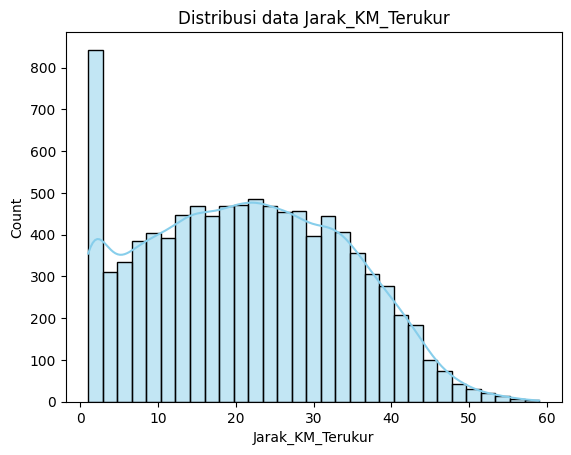

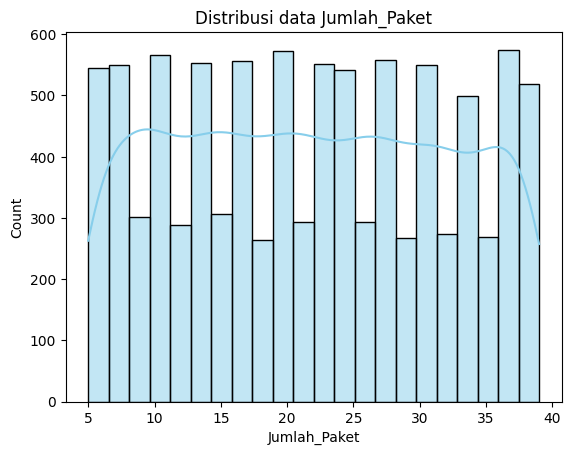

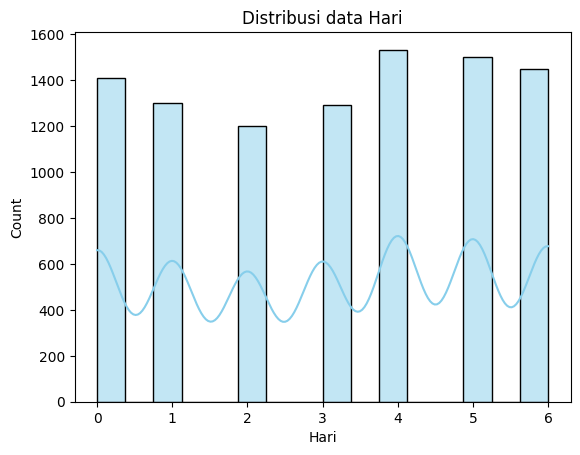

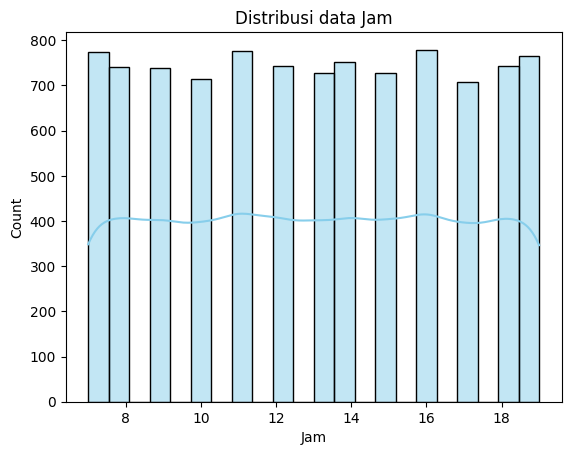

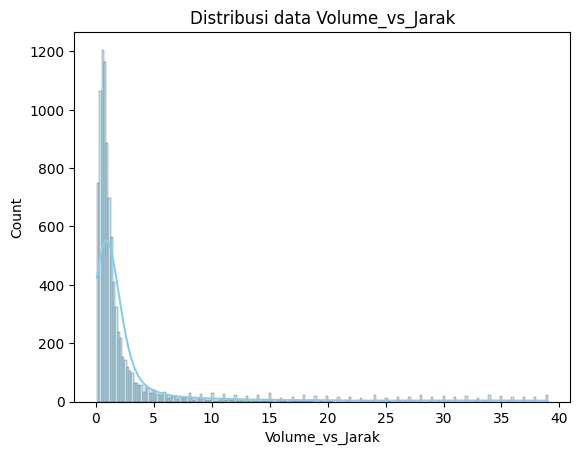

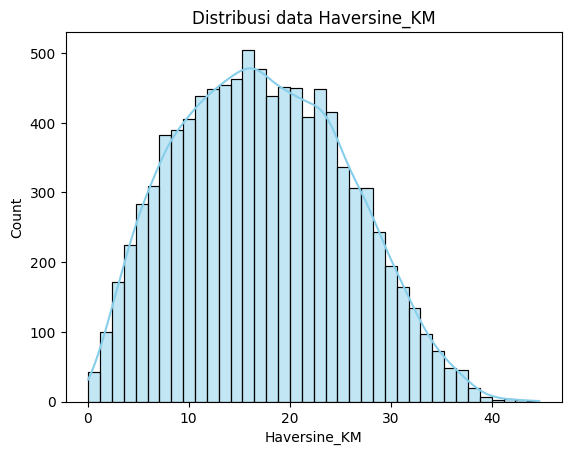

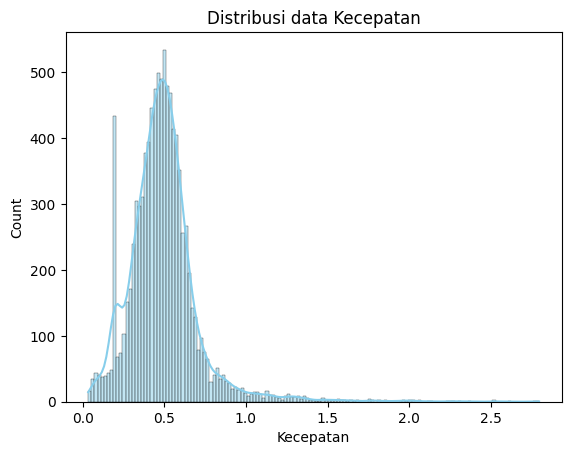

In [35]:
kolom = ['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari','Jam','Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

for kol in kolom:
    sns.histplot(df[kol], kde=True, color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

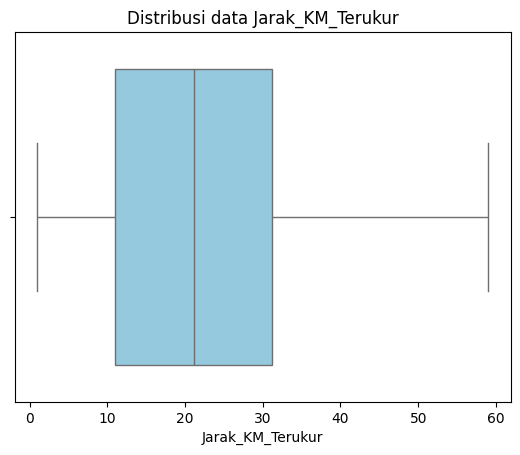

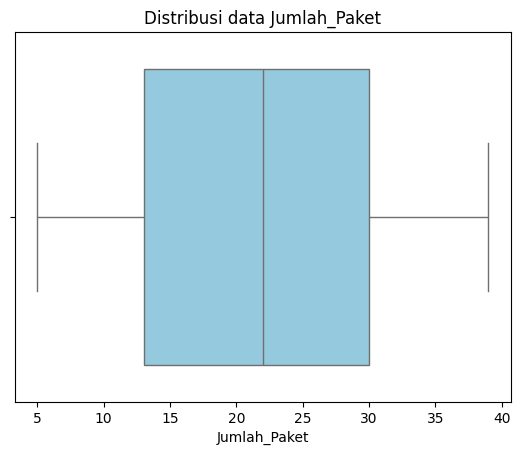

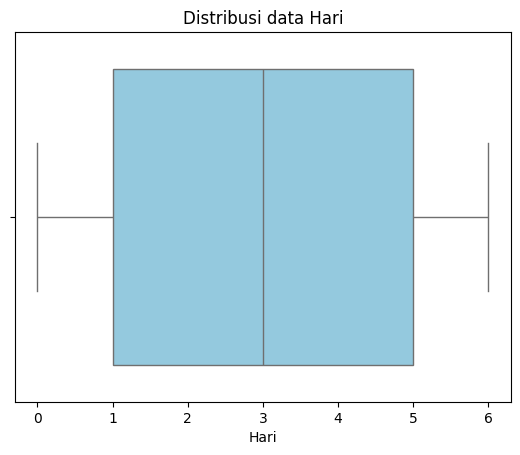

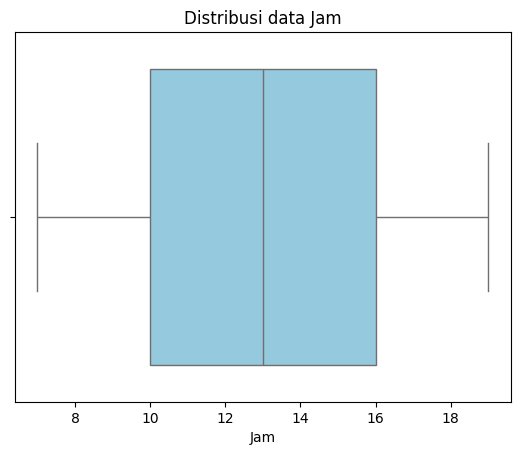

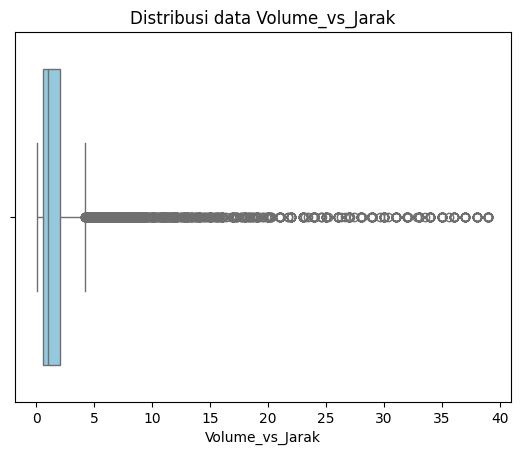

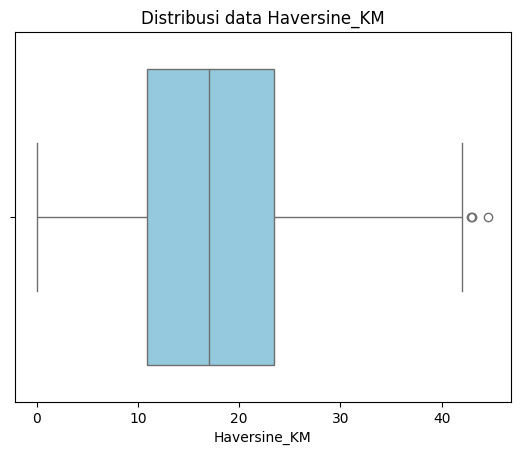

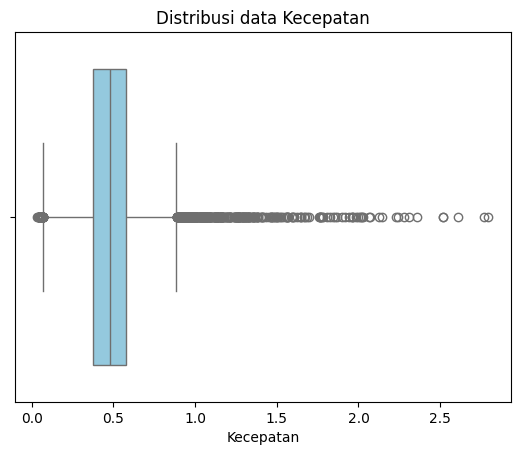

In [36]:
kolom = ['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari','Jam','Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan']

for kol in kolom:
    sns.boxplot(x = df[kol], color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

- Right Skewed = Jarak_KM_Terukur, Kecepatan (banyak outlier), Volume_vs_Jarak(banyak outlier)
- Normal = Haversine_KM
- Tanpa distribusi jelas = Jumlah_Paket, Hari, Jam

In [37]:
X_train[kolom].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 918 to 5635
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jarak_KM_Terukur  7752 non-null   float64
 1   Jumlah_Paket      7752 non-null   int64  
 2   Hari              7752 non-null   int32  
 3   Jam               7752 non-null   int32  
 4   Volume_vs_Jarak   7752 non-null   float64
 5   Haversine_KM      7752 non-null   float64
 6   Kecepatan         7752 non-null   float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 423.9 KB


In [38]:
log_kolom = ['Jarak_KM_Terukur', 'Kecepatan', 'Volume_vs_Jarak']
X_train[[f'log_{kolom}' for kolom in log_kolom]] = X_train[log_kolom].apply(np.log)

In [39]:
X_train.columns

Index(['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari', 'Jam', 'Is_Peak_Hour',
       'Is_Weekend', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan',
       'Tipe_Kendaraan_Motor', 'Tipe_Kendaraan_Truk_Kecil',
       'Tipe_Area_Tujuan_Industri', 'Tipe_Area_Tujuan_Perumahan',
       'log_Jarak_KM_Terukur', 'log_Kecepatan', 'log_Volume_vs_Jarak'],
      dtype='object')

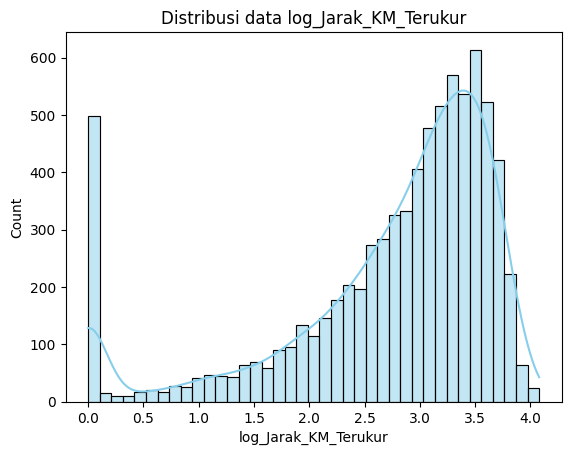

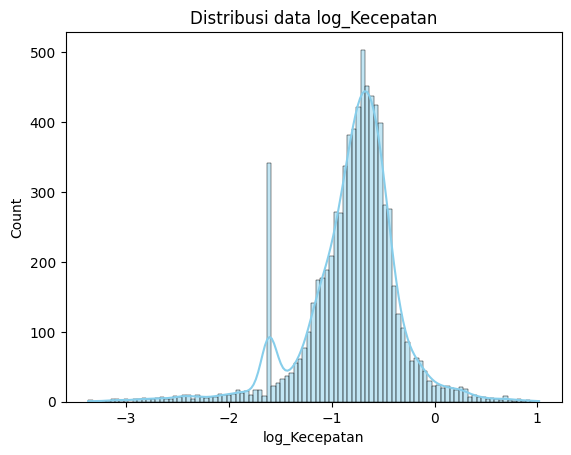

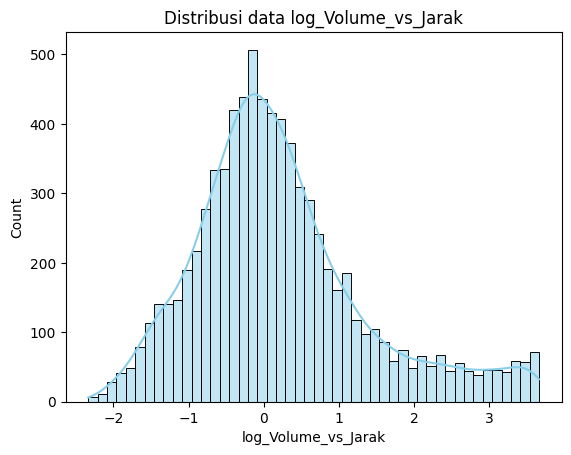

In [40]:
log_kolom = ['log_Jarak_KM_Terukur', 'log_Kecepatan', 'log_Volume_vs_Jarak']

for kol in log_kolom:
    sns.histplot(X_train[kol], kde=True, color='skyblue')
    plt.title(f'Distribusi data {kol}')
    plt.show()

### Robust scaler

In [41]:
log_kolom = ['log_Jarak_KM_Terukur', 'log_Kecepatan', 'log_Volume_vs_Jarak']

robust_scaler = RobustScaler()
X_train[log_kolom] = robust_scaler.fit_transform(X_train[log_kolom])
X_train.head()

,Jarak_KM_Terukur,Jumlah_Paket,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan,log_Jarak_KM_Terukur,log_Kecepatan,log_Volume_vs_Jarak
918,13.054057,16,3,14,0,0,1.225673,16.757574,0.481347,1.0,0.0,0.0,0.0,-0.460180,0.007495,0.139022
652,3.607898,34,5,9,0,1,9.423770,13.731160,0.721580,0.0,0.0,0.0,0.0,-1.687594,0.943622,1.775397
2492,39.197921,28,6,16,0,1,0.714324,16.840416,0.337774,0.0,0.0,0.0,1.0,0.589276,-0.811534,-0.294117
1839,32.760311,7,1,7,0,0,0.213673,19.079563,0.536641,1.0,0.0,0.0,1.0,0.418040,0.258933,-1.262337
568,26.552616,23,3,19,0,0,0.866205,6.657509,0.633132,1.0,0.0,0.0,0.0,0.217517,0.641262,-0.139456


### standar scaler

In [42]:
stadard_kolom = ['Haversine_KM', 'Jumlah_Paket', 'Hari', 'Jam']

standard_scaler = StandardScaler()
X_train[[f'sta_{kolom}' for kolom in stadard_kolom]] = standard_scaler.fit_transform(X_train[stadard_kolom])

In [43]:
X_train.head()

,Jarak_KM_Terukur,Jumlah_Paket,Hari,Jam,Is_Peak_Hour,Is_Weekend,Volume_vs_Jarak,Haversine_KM,Kecepatan,Tipe_Kendaraan_Motor,Tipe_Kendaraan_Truk_Kecil,Tipe_Area_Tujuan_Industri,Tipe_Area_Tujuan_Perumahan,log_Jarak_KM_Terukur,log_Kecepatan,log_Volume_vs_Jarak,sta_Haversine_KM,sta_Jumlah_Paket,sta_Hari,sta_Jam
918,13.054057,16,3,14,0,0,1.225673,16.757574,0.481347,1.0,0.0,0.0,0.0,-0.460180,0.007495,0.139022,-0.082415,-0.584576,-0.043371,0.271640
652,3.607898,34,5,9,0,1,9.423770,13.731160,0.721580,0.0,0.0,0.0,0.0,-1.687594,0.943622,1.775397,-0.448287,1.208750,0.952810,-1.060609
2492,39.197921,28,6,16,0,1,0.714324,16.840416,0.337774,0.0,0.0,0.0,1.0,0.589276,-0.811534,-0.294117,-0.072400,0.610974,1.450900,0.804539
1839,32.760311,7,1,7,0,0,0.213673,19.079563,0.536641,1.0,0.0,0.0,1.0,0.418040,0.258933,-1.262337,0.198296,-1.481239,-1.039552,-1.593508
568,26.552616,23,3,19,0,0,0.866205,6.657509,0.633132,1.0,0.0,0.0,0.0,0.217517,0.641262,-0.139456,-1.303441,0.112828,-0.043371,1.603889


## scaling y_train_reg

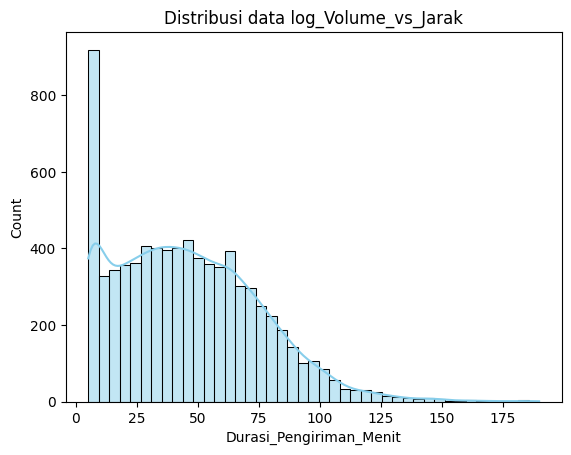

In [44]:
sns.histplot(y_train_reg, kde=True, color='skyblue')
plt.title(f'Distribusi data {kol}')
plt.show()

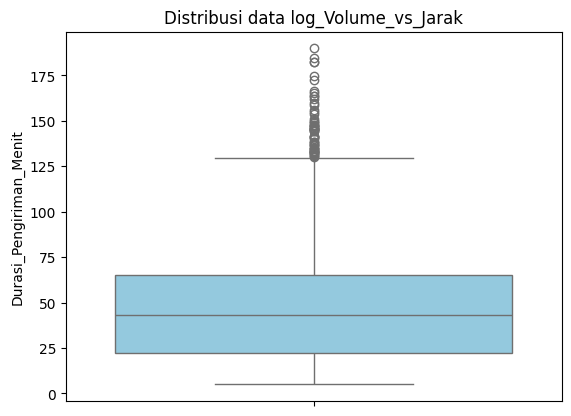

In [45]:
sns.boxplot(y_train_reg, color='skyblue')
plt.title(f'Distribusi data {kol}')
plt.show()

datanya skewed dan ada outlier

In [46]:
y_train_reg_log = y_train_reg.apply(np.log)
y_train_robust_scaler = RobustScaler()
y_train_reg_scaled = y_train_robust_scaler.fit_transform(y_train_reg_log.values.reshape(-1, 1))

## Feature Selection

### Mengecek korelasi dengan kolom target

In [47]:
X_train.columns

Index(['Jarak_KM_Terukur', 'Jumlah_Paket', 'Hari', 'Jam', 'Is_Peak_Hour',
       'Is_Weekend', 'Volume_vs_Jarak', 'Haversine_KM', 'Kecepatan',
       'Tipe_Kendaraan_Motor', 'Tipe_Kendaraan_Truk_Kecil',
       'Tipe_Area_Tujuan_Industri', 'Tipe_Area_Tujuan_Perumahan',
       'log_Jarak_KM_Terukur', 'log_Kecepatan', 'log_Volume_vs_Jarak',
       'sta_Haversine_KM', 'sta_Jumlah_Paket', 'sta_Hari', 'sta_Jam'],
      dtype='object')

In [48]:
kolom = ['Is_Peak_Hour', 'Is_Weekend',
       'Tipe_Kendaraan_Motor', 'Tipe_Kendaraan_Truk_Kecil',
       'Tipe_Area_Tujuan_Industri', 'Tipe_Area_Tujuan_Perumahan',
       'log_Jarak_KM_Terukur', 'log_Kecepatan', 'log_Volume_vs_Jarak',
       'sta_Haversine_KM', 'sta_Jumlah_Paket', 'sta_Hari', 'sta_Jam']

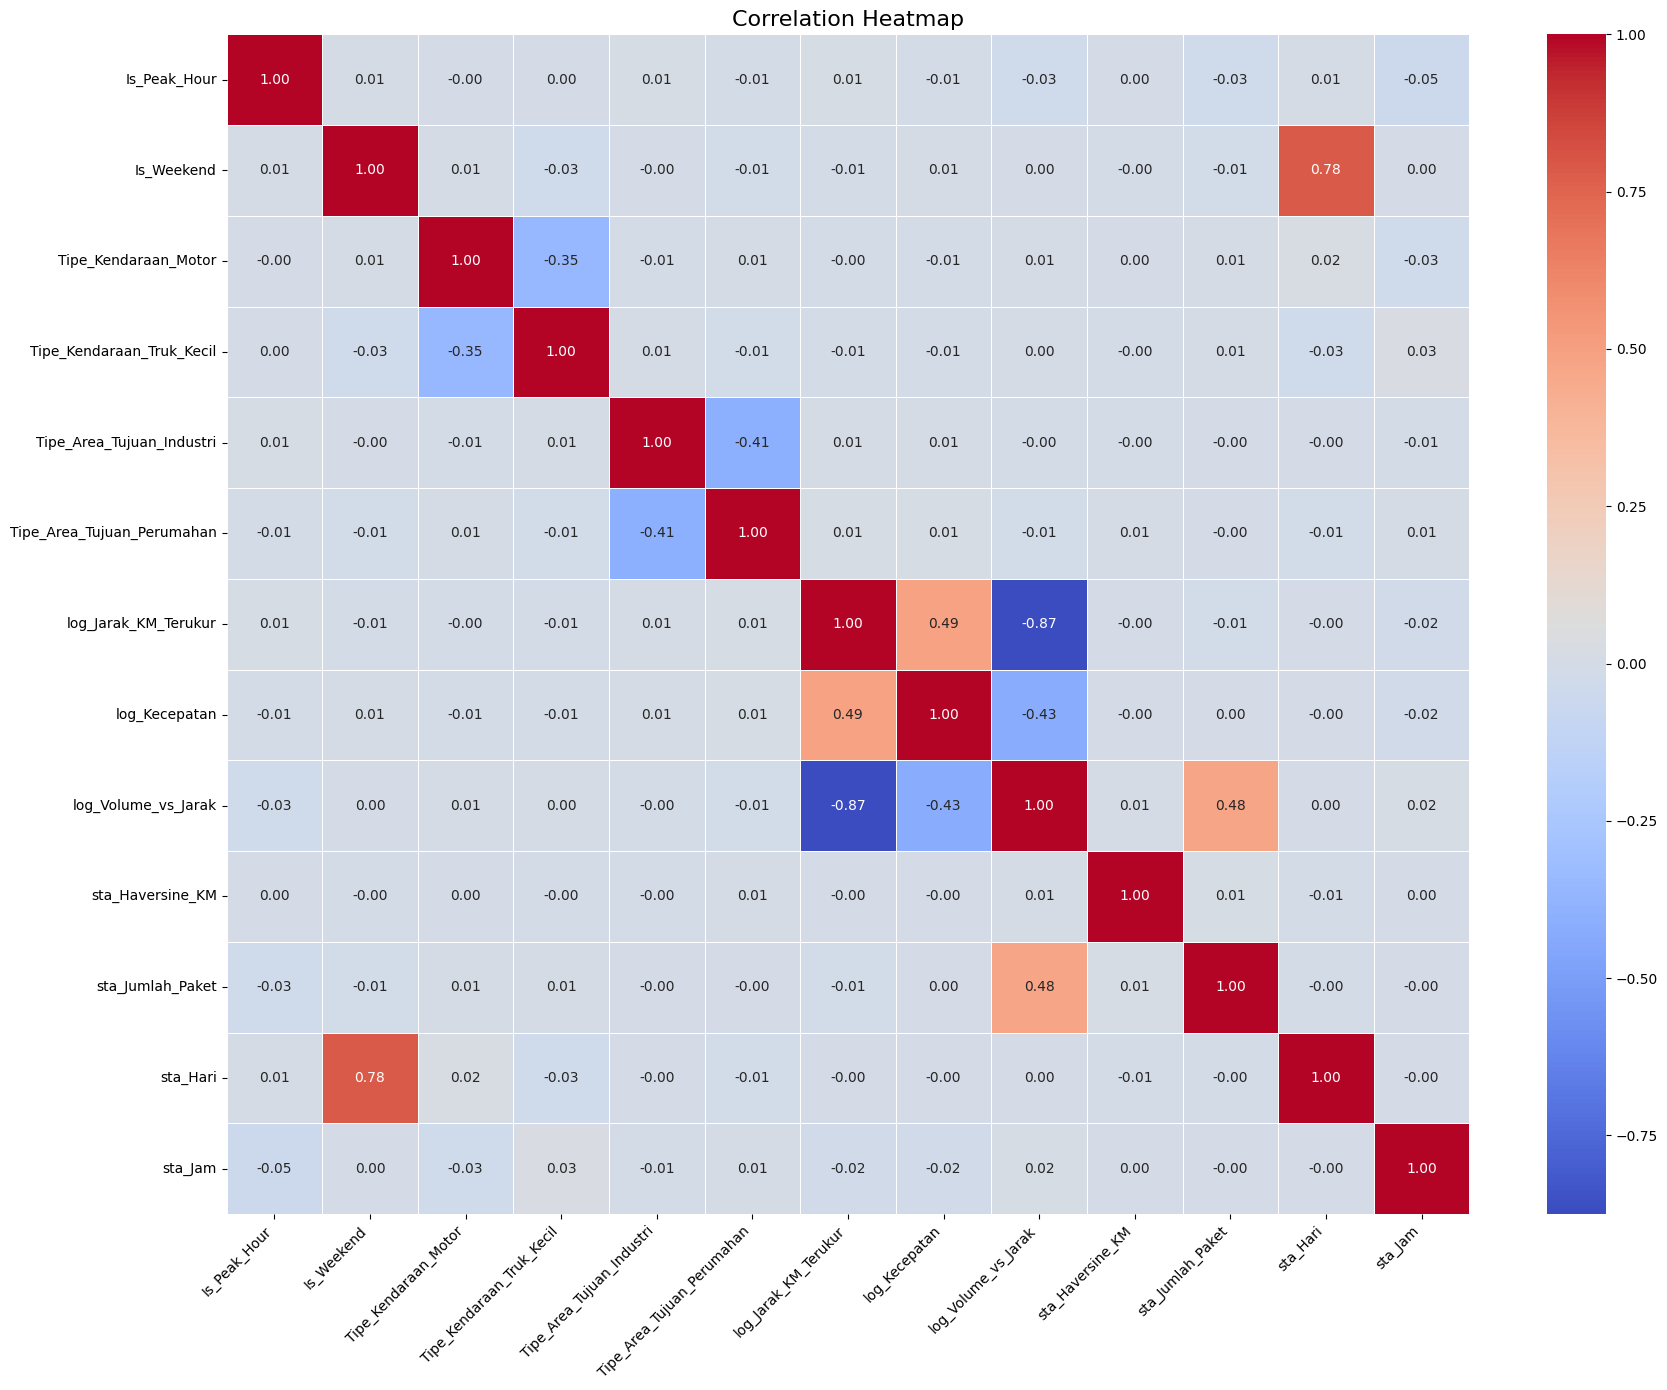

In [49]:
corr = X_train[kolom].corr(numeric_only=True)
plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

dari visualisasi heatmap tersebut, terdapat feature yang memiliki korelasi tinggi (-0.87) yaitu : log_Volume_vs_Jarak dan log_Jarak_KM_Terukur. Terdapat kolom yang saling terikat yaitu Is_Weekend dan sta_Hari.

- log_jarak_KM_Terukur akan dihapus karena pada dataset sudah terdapat kolom sta_Harvesine_KM yang memiliki informasi jarak
- sta_Hari akan dihapus dan dipilih kolom Is_Weekend

In [50]:
kolom = ['Is_Peak_Hour', 'Is_Weekend',
       'Tipe_Kendaraan_Motor', 'Tipe_Kendaraan_Truk_Kecil',
       'Tipe_Area_Tujuan_Industri', 'Tipe_Area_Tujuan_Perumahan', 'log_Kecepatan', 'log_Volume_vs_Jarak',
       'sta_Haversine_KM', 'sta_Jumlah_Paket', 'sta_Jam']

X_train = X_train[kolom]


## pipeline scaling

In [51]:
# log_features = ['Jarak_KM_Terukur', 'Kecepatan', 'Volume_vs_Jarak']
# standard_features = ['Haversine_KM', 'Jumlah_Paket', 'Hari', 'Jam']

# # pipeline untuk log + robust scaling
# log_robust_pipeline = Pipeline([
#     ('log_transform', FunctionTransformer(np.log, validate=False)),
#     ('robust_scaler', RobustScaler())
# ])

# # pipeline untuk standard scaling
# standard_pipeline = Pipeline([
#     ('standard_scaler', StandardScaler())
# ])

# # gabungkan dalam ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('log_robust', log_robust_pipeline, log_features),
#         ('standard', standard_pipeline, standard_features)
#     ],
#     remainder='passthrough'
# )

# # fit transform dataset
# scaled_df = preprocessor.fit_transform('datanya')

## Training Baseline Model

### Baseline Model untuk memprediksi durasi pengantara

In [52]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train_reg_scaled)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred_reg_scaled = model_reg.predict(X_train)

In [54]:
# inverse scaling
y_pred_log = y_train_robust_scaler.inverse_transform(y_pred_reg_scaled.reshape(-1,1))
y_pred = np.exp(y_pred_log).ravel()

In [55]:
mae_train = mean_absolute_error(y_train_reg, y_pred)
mae_train

5.43256264676239

In [87]:
selisih = df['Durasi_Pengiriman_Menit'] - df['ETA_Awal_Menit']
selisih.mean()

np.float64(5.363785121812112)

baseline model yang dibuat belum dapat mengalahkan sistem sebelumnya. perlu dilakukan training menggunakan model lain

### Baseline Model untuk mengklasifiksikan apakah telat atau tidak

In [56]:
model_clf = LogisticRegression(random_state=42)
model_clf.fit(X_train, y_train_clf)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
y_pred_clf = model_clf.predict(X_train)
y_pred_clf

array([0, 0, 1, ..., 0, 0, 0], shape=(7752,))

In [60]:
print('accuracy: ', accuracy_score(y_train_clf, y_pred_clf))
print('confusion matrix: \n', confusion_matrix(y_train_clf, y_pred_clf))
print('classification report: \n', classification_report(y_train_clf, y_pred_clf))

accuracy:  0.9714912280701754
confusion matrix: 
 [[7339   52]
 [ 169  192]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7391
           1       0.79      0.53      0.63       361

    accuracy                           0.97      7752
   macro avg       0.88      0.76      0.81      7752
weighted avg       0.97      0.97      0.97      7752



model dapat ditingkatkan kembali. Data yang digunakan memiliki imbalace class, perlu dilakukan teknik untuk lebih menyeimbangkan kelas

### Baseline model untuk melakukan optimasi rute

In [66]:
X_Cluster = df[['Lat_Tujuan', 'Lon_Tujuan']].copy()

In [68]:
scaler_geo = StandardScaler()
X_cluster_scaled = scaler_geo.fit_transform(X_Cluster)

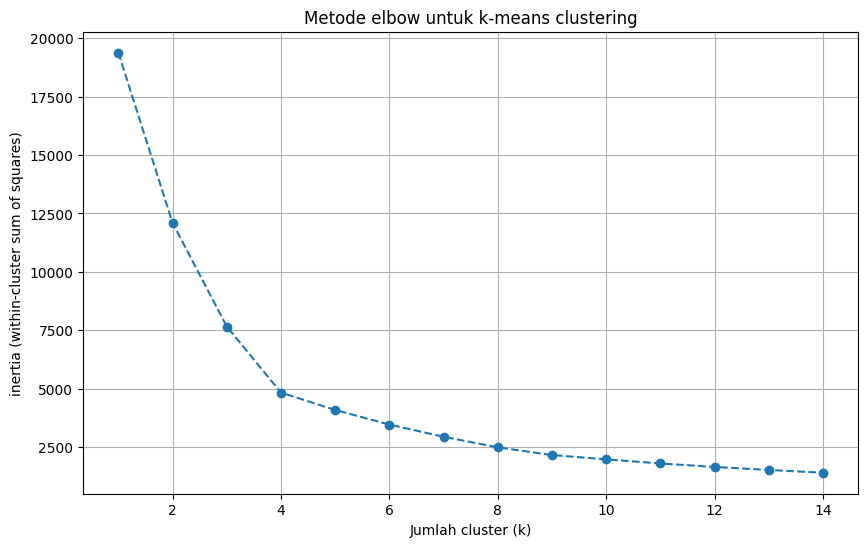

In [72]:
# Menentukan jumlah cluster optimal

inertia = []
K_range = range(1,15)
for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_cluster_scaled)
    inertia.append(kmeans_model.inertia_)

# ploting elbow
plt.figure(figsize=(10,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Metode elbow untuk k-means clustering')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('inertia (within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [73]:
K_optimal = 4
kmeans_baseline = KMeans(n_clusters=K_optimal, random_state=4, n_init=10)
kmeans_baseline.fit(X_cluster_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,4
,copy_x,True
,algorithm,'lloyd'


In [75]:
df['cluster_rute'] = kmeans_baseline.labels_

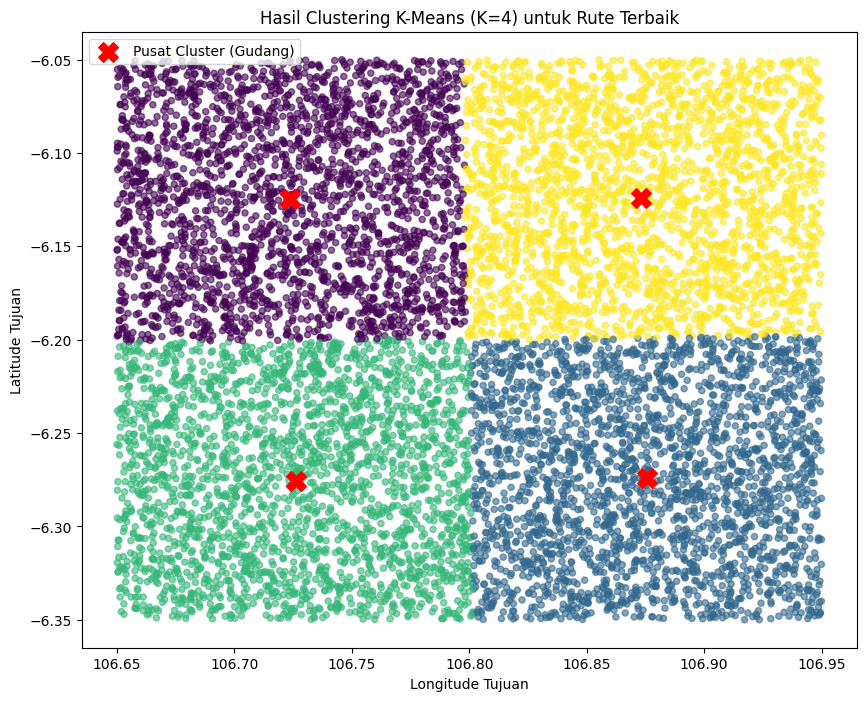

In [76]:
plt.figure(figsize=(10,8))

plt.scatter(df['Lon_Tujuan'], df['Lat_Tujuan'],
            c=df['cluster_rute'], cmap='viridis', s=20, alpha=0.6)

centers = scaler_geo.inverse_transform(kmeans_baseline.cluster_centers_)
plt.scatter(centers[:,1], centers[:, 0],
            c='red', marker='X', s=200, label='Pusat Cluster (Gudang)')

plt.title(f'Hasil Clustering K-Means (K={K_optimal}) untuk Rute Terbaik')
plt.xlabel('Longitude Tujuan')
plt.ylabel('Latitude Tujuan')
plt.legend()
plt.show()

In [78]:
print(f"\nJumlah pengiriman per cluster:\n{df['cluster_rute'].value_counts()}")


Jumlah pengiriman per cluster:
cluster_rute
1    2499
3    2404
0    2395
2    2393
Name: count, dtype: int64
